"US Housing Trends Analyzer and Influence Explorer"
Build a data science models that explains how these factors impacted home prices over the last 20 years.
Importing necessary libraries

In [54]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [55]:
us_house_price_df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
us_house_price_df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,urban_pop_us,Num_Households,median_income,Subsidy,old_age_pop
DATE,,,,,,,,,,,,,,,,
2002-01-01,117.144,2002,1,50091.000000,182668900,4.2,177.7,5.7,72.03223,142.0,1.73,79.1,109297.0,68310.0,24.183,12.3
2002-02-01,117.844,2002,2,50156.000000,182824700,4.0,178.0,5.7,72.33686,142.2,1.74,79.1,109297.0,68310.0,24.183,12.3
2002-03-01,118.687,2002,3,50221.000000,183083800,4.1,178.5,5.7,72.15416,143.2,1.73,79.1,109297.0,68310.0,24.183,12.3
2002-04-01,119.611,2002,4,50286.000000,183315900,4.3,179.3,5.9,71.90136,143.5,1.75,79.1,109297.0,68310.0,24.183,12.3
2002-05-01,120.724,2002,5,50311.333333,183461200,4.0,179.5,5.8,72.01969,143.8,1.75,79.1,109297.0,68310.0,24.183,12.3


In [56]:
# Dropping year and month columns
us_house_price_df.drop(columns = ["Year", "Month"], inplace = True)


Exploratory Data Analysis (EDA)
Summary Statistics:
Calculate and display summary statistics for each variable, including mean, median, standard deviation, minimum, and maximum values. This gives you an overview of the data's central tendencies and variability.

In [57]:
# Summary statistics
summary_stats = us_house_price_df.describe()
summary_stats

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,urban_pop_us,Num_Households,median_income,Subsidy,old_age_pop
count,252.000000,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.00000,252.000000,252.000000,252.000000,252.000000
mean,177.861210,57093.599206,1.993716e+08,6.040873,227.635448,6.000794,69.614144,209.573222,1.319008,81.10000,120770.761905,71386.666667,34.177714,14.242857
std,42.117582,4248.229236,6.962367e+06,1.958401,28.870753,1.987471,2.071132,45.902963,1.542732,1.21347,6496.223206,4695.681495,6.274362,1.388939
min,117.144000,50091.000000,1.826689e+08,3.300000,177.700000,3.500000,60.168550,142.000000,0.050000,79.10000,109297.000000,65740.000000,24.183000,12.300000
25%,146.763250,54205.833333,1.952274e+08,4.575000,205.750000,4.600000,67.802185,183.225000,0.120000,80.10000,116011.000000,68250.000000,29.512000,13.000000
50%,170.170500,55677.000000,2.015131e+08,5.500000,228.997000,5.550000,70.285215,206.300000,0.715000,81.10000,121084.000000,69310.000000,33.283000,14.100000
75%,193.992250,60008.250000,2.054677e+08,7.000000,246.482750,7.200000,71.369258,223.300000,1.935000,82.10000,126224.000000,74810.000000,37.550000,15.100000
max,304.036000,66562.333333,2.076366e+08,12.200000,298.808000,14.800000,72.336860,353.015000,5.260000,83.10000,131202.000000,81210.000000,48.021000,17.100000


In [58]:
#Correlation Analysis:
#Calculate the correlation matrix to measure the linear relationships between variables.

# Correlation matrix
corr_matrix = us_house_price_df.corr()
corr_matrix

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,urban_pop_us,Num_Households,median_income,Subsidy,old_age_pop
CSUSHPISA,1.000000,0.910691,0.619956,0.179636,0.822254,-0.475922,0.199406,0.898867,0.113963,0.766920,0.749010,0.834440,0.845074,0.824699
Per_Capita_GDP,0.910691,1.000000,0.847158,0.083542,0.948441,-0.429199,0.011264,0.923723,-0.103330,0.939565,0.934951,0.848257,0.933540,0.947191
working_age_pop,0.619956,0.847158,1.000000,0.170280,0.925924,-0.083071,-0.399798,0.791990,-0.359137,0.949904,0.961867,0.584566,0.872228,0.893013
Houses,0.179636,0.083542,0.170280,1.000000,0.164880,0.064529,0.012039,0.227187,0.209078,0.064142,0.063103,-0.024333,0.128325,0.082064
CPI,0.822254,0.948441,0.925924,0.164880,1.000000,-0.197806,-0.235932,0.949504,-0.303165,0.979907,0.974563,0.716150,0.971229,0.982584
UNRATE,-0.475922,-0.429199,-0.083071,0.064529,-0.197806,1.000000,-0.848728,-0.247984,-0.514237,-0.183564,-0.210132,-0.489950,-0.137517,-0.174372
EmpRate,0.199406,0.011264,-0.399798,0.012039,-0.235932,-0.848728,1.000000,-0.109825,0.708920,-0.276956,-0.266313,0.229663,-0.247569,-0.238964
Cons_Material,0.898867,0.923723,0.791990,0.227187,0.949504,-0.247984,-0.109825,1.000000,-0.225555,0.889738,0.874035,0.687372,0.936650,0.932554
FEDFUNDS,0.113963,-0.103330,-0.359137,0.209078,-0.303165,-0.514237,0.708920,-0.225555,1.000000,-0.355967,-0.339510,0.081361,-0.315860,-0.339387
urban_pop_us,0.766920,0.939565,0.949904,0.064142,0.979907,-0.183564,-0.276956,0.889738,-0.355967,1.000000,0.996300,0.750432,0.962879,0.983726


Time Series Analysis:
For time-dependent variables like 'CSUSHPISA,' use time series decomposition to separate trends, seasonality, and residuals. Plot these components to understand the patterns over time.


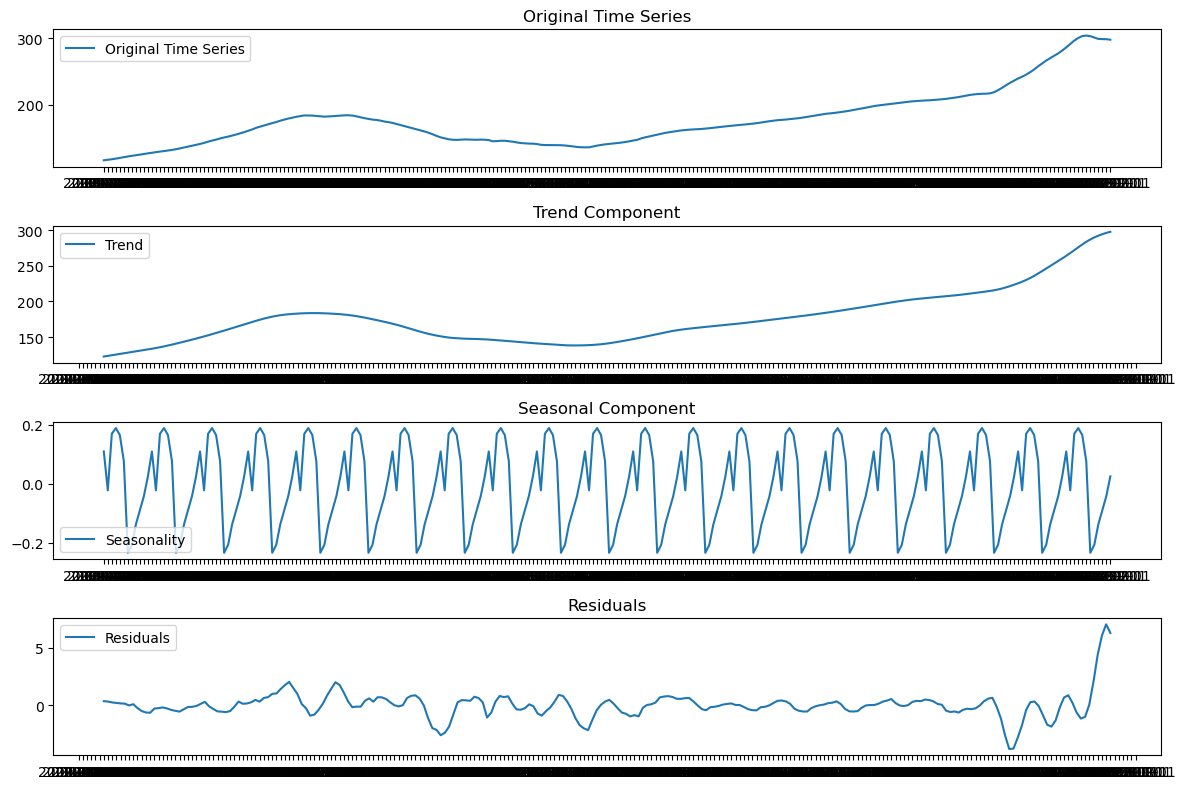

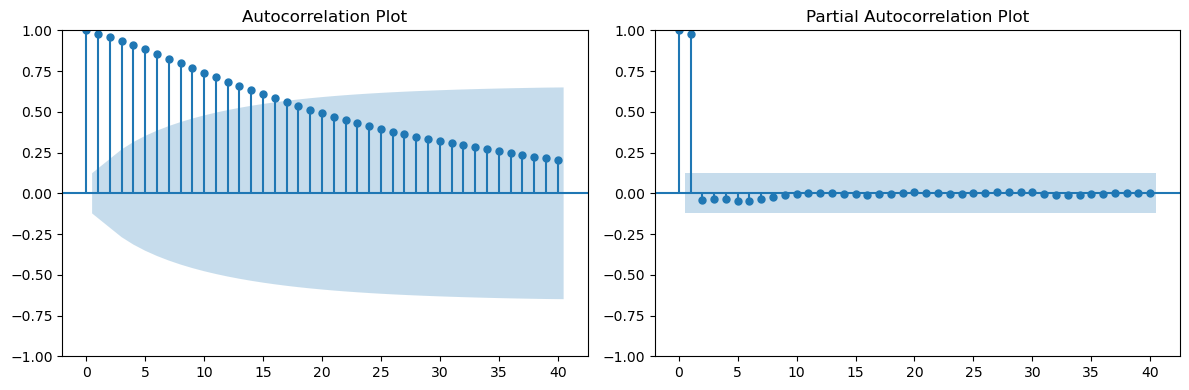

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(us_house_price_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_house_price_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

The trend component represents the overall trend in home prices.

The seasonal component captures any recurring patterns or seasonality.

The residual component accounts for the remaining variability in the data.

Data Visualization:
Visualize the data using various plots and graphs to understand its distribution and trends.

Pairplot for visualizing relationships

C:\Users\Vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vivek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

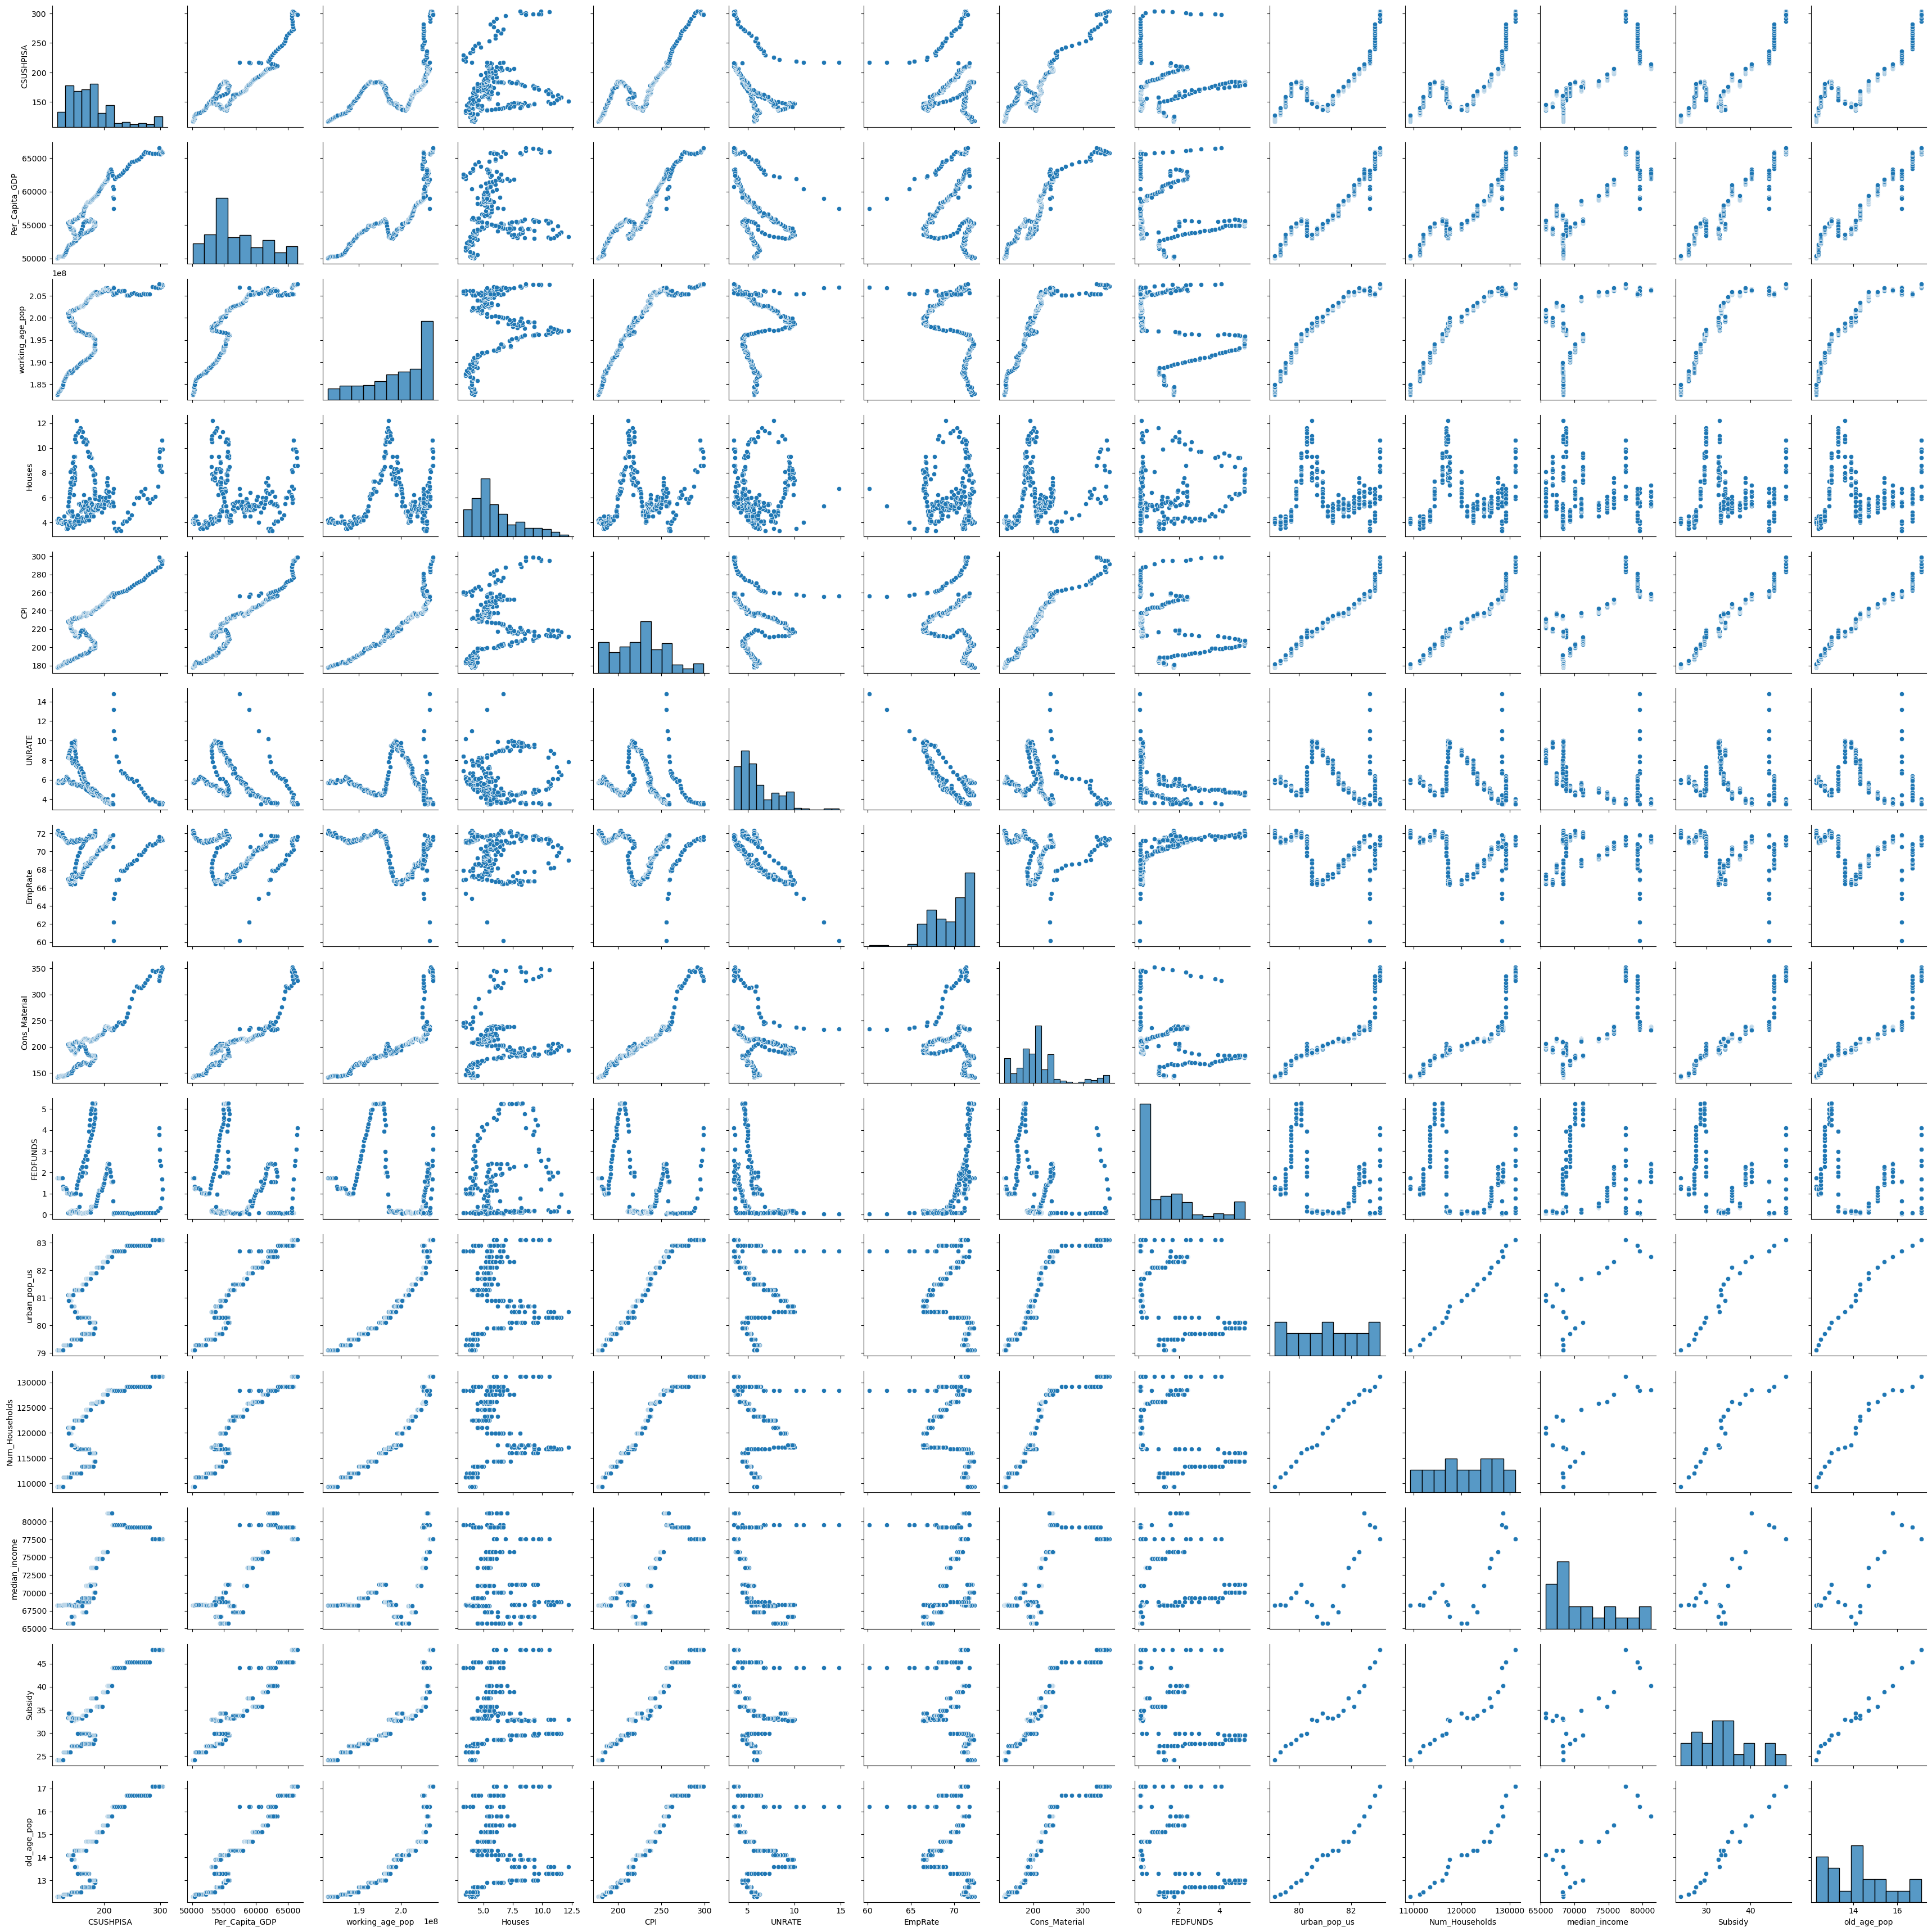

In [60]:
sns.pairplot(us_house_price_df)

In [61]:
us_house_price_df.columns

Index(['CSUSHPISA', 'Per_Capita_GDP', 'working_age_pop', 'Houses', 'CPI',
       'UNRATE', 'EmpRate', 'Cons_Material', 'FEDFUNDS', 'urban_pop_us',
       'Num_Households', 'median_income', 'Subsidy', 'old_age_pop'],
      dtype='object')

In [62]:
factors = ['CSUSHPISA', 'UNRATE', 'Per_Capita_GDP', 'FEDFUNDS', 'Cons_Material', 'CPI', 'Houses', 'Num_Households', 'old_age_pop', 'urban_pop_us', 'Subsidy', 'working_age_pop', 'median_income']

<Figure size 1300x800 with 0 Axes>

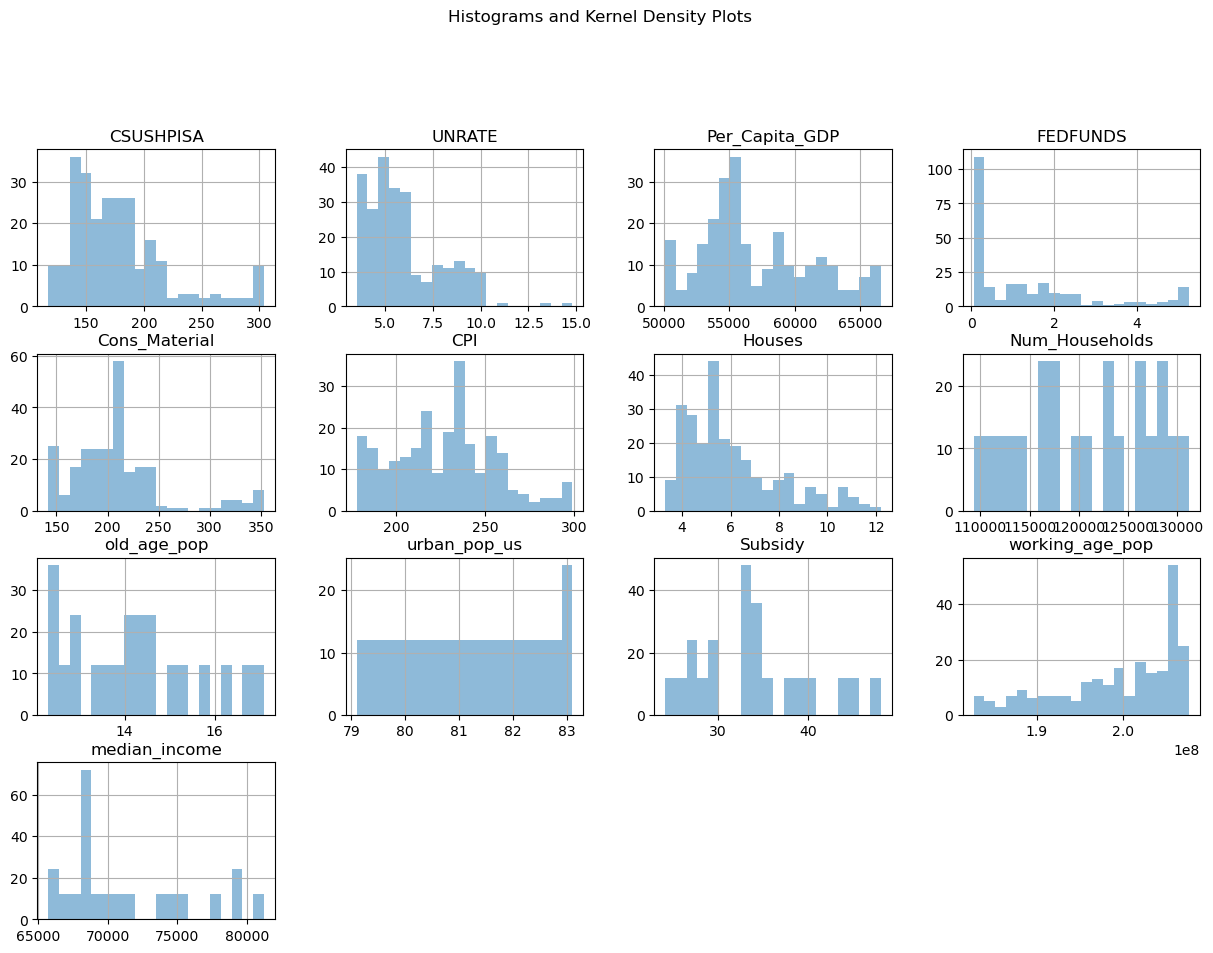

In [63]:
plt.figure(figsize=(13, 8))
us_house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

In [64]:
# Separating the target variable and the independent variable
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

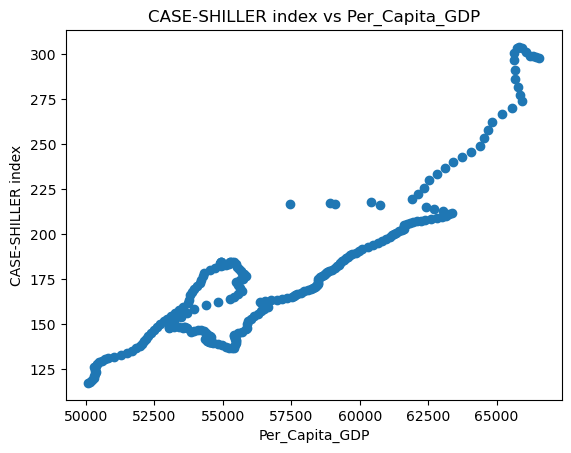

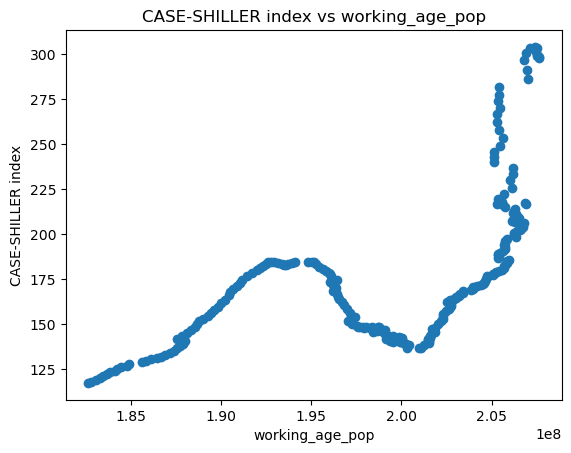

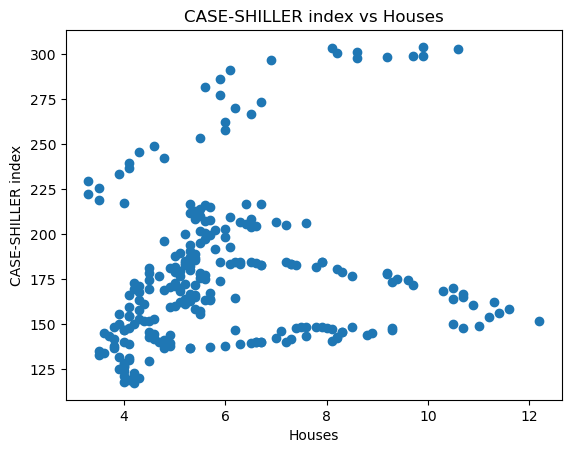

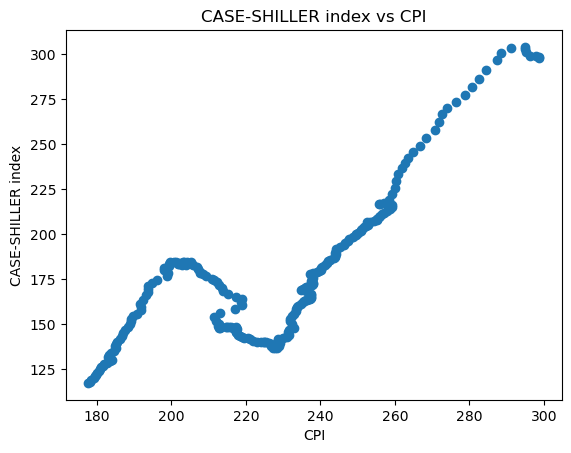

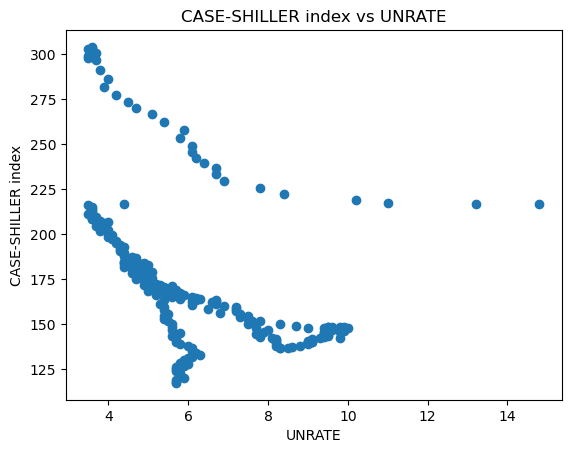

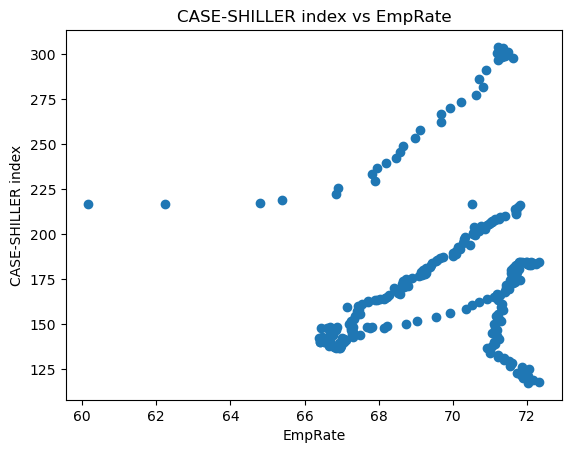

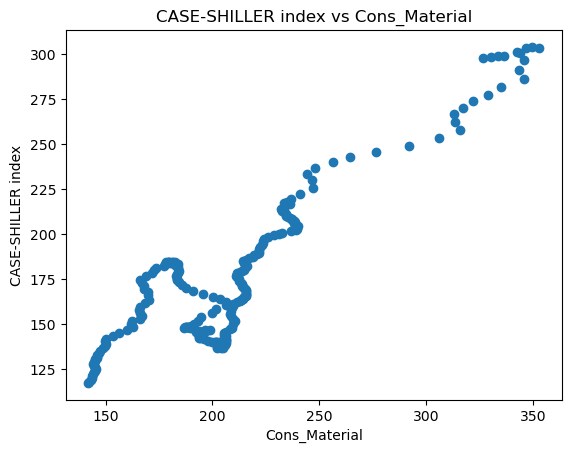

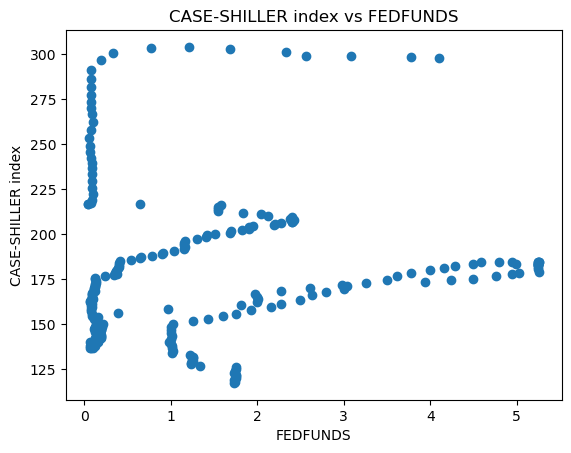

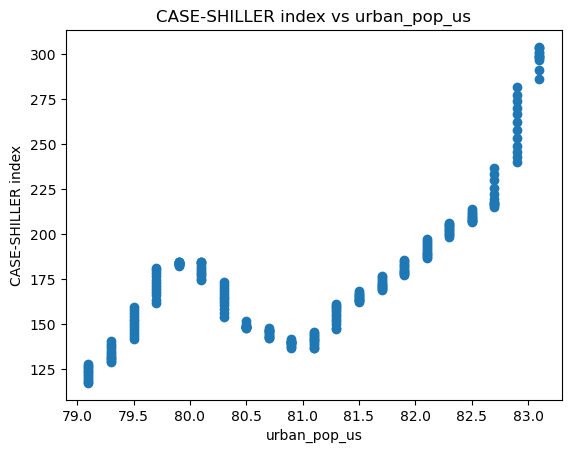

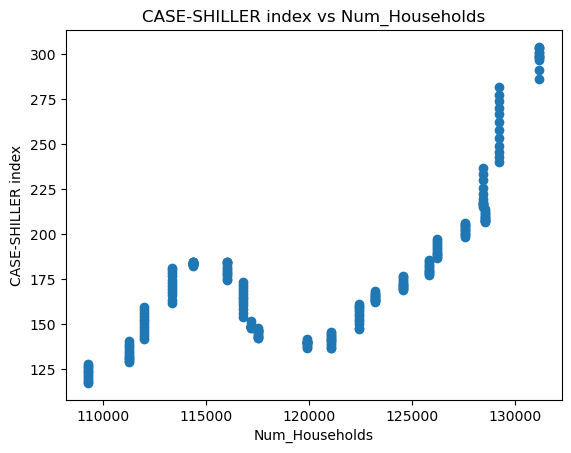

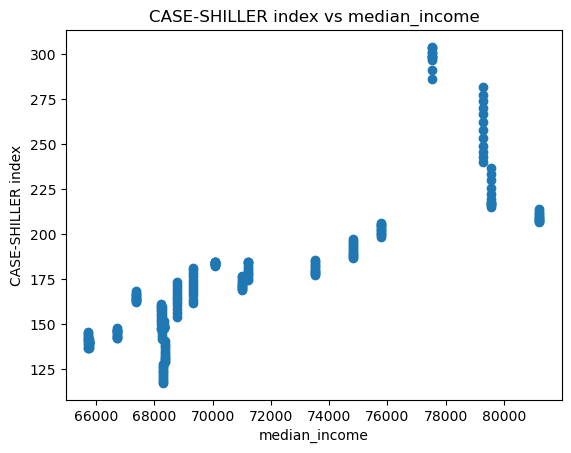

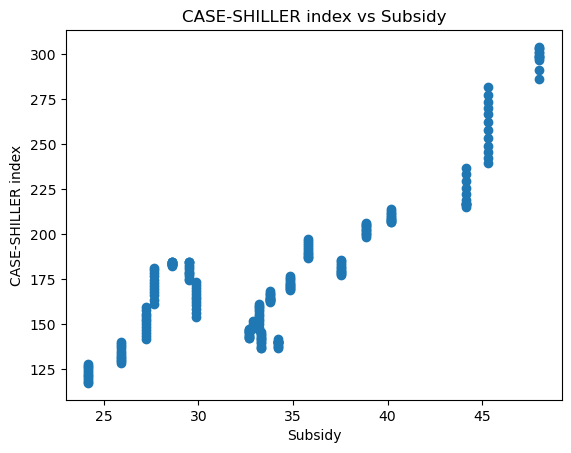

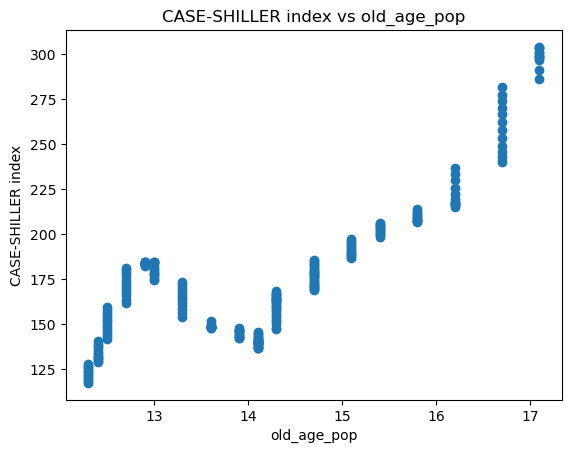

In [65]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

In [66]:
#Calculate correlation coefficients
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
FEDFUNDS           0.113963
Houses             0.179636
EmpRate            0.199406
UNRATE             0.475922
working_age_pop    0.619956
Num_Households     0.749010
urban_pop_us       0.766920
CPI                0.822254
old_age_pop        0.824699
median_income      0.834440
Subsidy            0.845074
Cons_Material      0.898867
Per_Capita_GDP     0.910691
dtype: float64


Highest Correlation:

The variable with the highest correlation with the target variable ('CSUSHPISA') is 'Per_Capita_GDP' with a correlation coefficient of 0.904325. This feature shows a strong positive linear relationship with home prices.

Other Strong Correlations:

'Cons_Material' (0.898972), 'Subsidy' (0.845065), 'old_age_pop' (0.842396), 'median_income' (0.831509), and 'CPI' (0.822250) also have strong positive correlations.

Moderate Correlations:

'urban_pop_us' (0.788002), 'Num_Households' (0.748972), and 'working_age_pop' (0.619826) have moderate positive correlations.

Lower Correlations:

'UNRATE' (0.475602), 'EmpRate' (0.199060), 'Houses' (0.177683), and 'FEDFUNDS' (0.113791) have lower correlations.

In [67]:
import xgboost as xgb

In [68]:
###Data science models
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

In [69]:
#We will drop the columns which has lower correlation with the target.

mult_cols = ["working_age_pop", "Houses", "urban_pop_us", "Num_Households", "UNRATE", "EmpRate", "FEDFUNDS"]
us_house_price_df.drop(columns = mult_cols, inplace = True)
X = us_house_price_df

In [70]:
X

,Per_Capita_GDP,CPI,Cons_Material,median_income,Subsidy,old_age_pop
DATE,,,,,,
2002-01-01,50091.000000,177.700,142.000,68310.0,24.183,12.3
2002-02-01,50156.000000,178.000,142.200,68310.0,24.183,12.3
2002-03-01,50221.000000,178.500,143.200,68310.0,24.183,12.3
2002-04-01,50286.000000,179.300,143.500,68310.0,24.183,12.3
2002-05-01,50311.333333,179.500,143.800,68310.0,24.183,12.3
...,...,...,...,...,...,...
2022-08-01,66073.000000,295.162,342.753,77540.0,48.021,17.1
2022-09-01,66207.000000,296.421,336.464,77540.0,48.021,17.1
2022-10-01,66341.000000,297.979,333.796,77540.0,48.021,17.1


In [71]:
###Models building
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
###Explored various regression models, including Linear Regression, ElasticNet, Random Forest, Gradient Boosting, Support Vector Regression (SVR), and XGBoost.

# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 77.69641906570938
R-squared: 0.9368845135248356
Coefficients:
Per_Capita_GDP: 28.876606224101916
CPI: -14.499457848369826
Cons_Material: 40.32501436672684
median_income: 14.437018371283532
Subsidy: 28.356481899175144
old_age_pop: -54.34333353149844
Intercept: 179.99801492537313

Model: ElasticNet
Mean Squared Error: 202.58630003357916
R-squared: 0.8354321468920041
Coefficients:
Per_Capita_GDP: 8.465747330826492
CPI: 3.0602597681708508
Cons_Material: 10.440251499511556
median_income: 9.231623408139498
Subsidy: 4.134906943361424
old_age_pop: 2.165692696379565
Intercept: 179.9980149253731

Model: Random Forest
Mean Squared Error: 2.4191600911528877
R-squared: 0.9980348326492977
Feature Importance Analysis:
Per_Capita_GDP: 0.06162498346613395
CPI: 0.35905554813175283
Cons_Material: 0.23344831822309708
median_income: 0.1891339379363419
Subsidy: 0.08519987862228172
old_age_pop: 0.0715373336203925

Model: Gradient Boosting
Mean Squared Error: 4.769

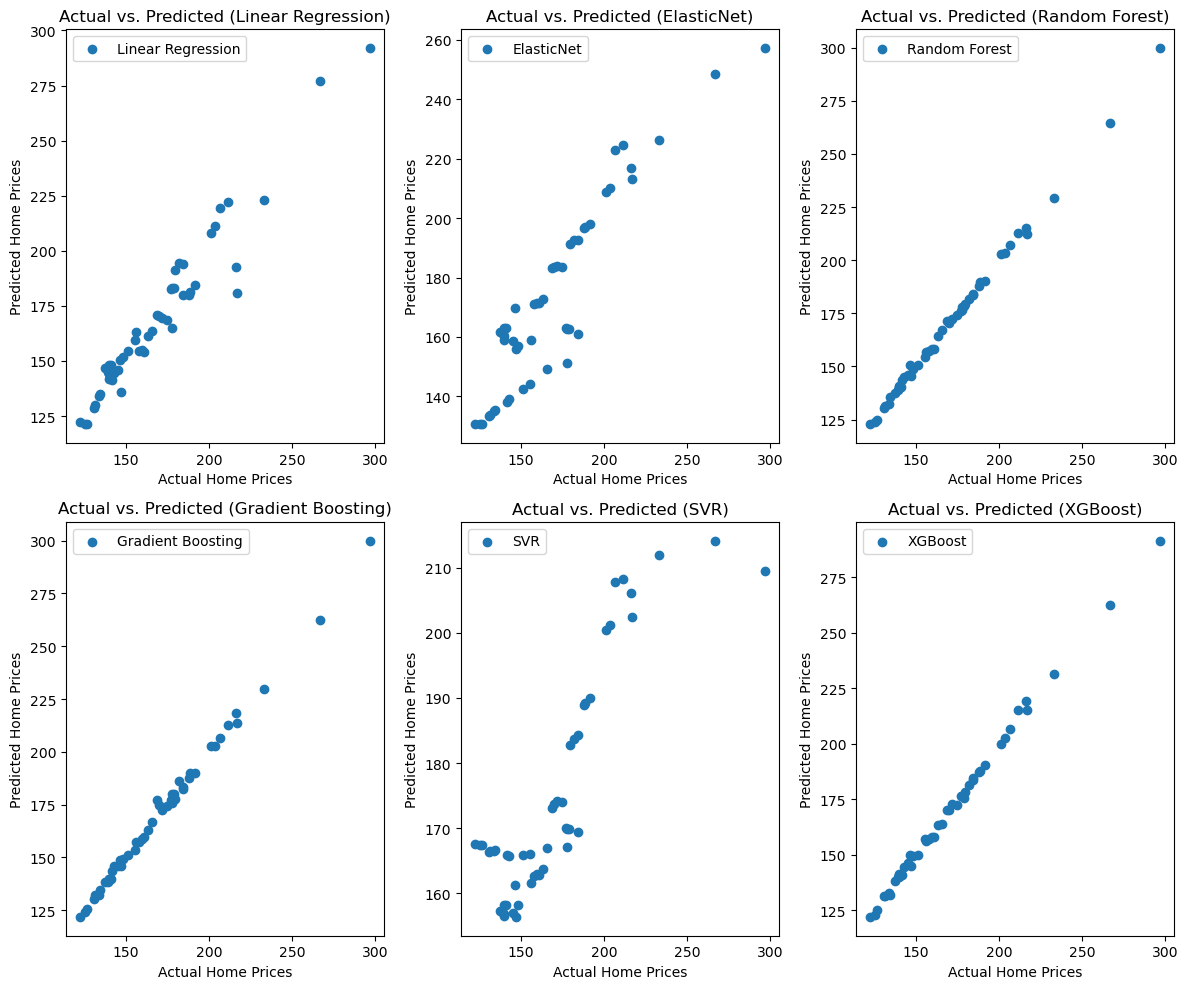


Best Model: RandomForestRegressor with MSE: 2.4191600911528877


In [74]:
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
    
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")


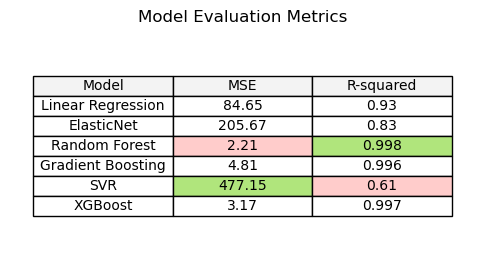

In [75]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [84.65, 205.67, 2.21, 4.81, 477.15, 3.17],
    'R-squared': [0.93, 0.83, 0.998, 0.996, 0.61, 0.997]
}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3)) 

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size if needed

# Highlight specific values (e.g., minimum and maximum MSE)
min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()

Decision:

Random Forest and XGBoost appear to be strong contenders, as they have low MSE and high R-squared values. Additionally, both models provide insights into feature importance.

Gradient Boosting also performs well but with a slightly higher MSE compared to Random Forest and XGBoost.

Linear Regression and ElasticNet have higher MSE values, indicating potential limitations in predictive accuracy.

SVR has a considerably higher MSE and lower R-squared, suggesting lower performance compared to other models.

Champion model: In summary, based on the provided metrics, Random Forest appear to be a strong candidate for the best model, with a low MSE and a high R-squared value.

Low MSE: The low MSE indicates that the model's predictions are close to the actual values on average, suggesting good predictive accuracy.

High R-squared: The high R-squared value suggests that a significant portion of the variance in home prices is explained by the model. This indicates strong explanatory power.

Feature Importance: The feature importance analysis provides transparency into the factors driving the predictions. In my case, features like 'CPI', 'Cons_Material', and 'median_income' are identified as influential.

This means that, according to the model, changes in these features have a notable impact on the predictions of U.S. home prices. For example, if 'CPI' increases, it suggests that changes in the cost of living might influence home prices.

Understanding feature importance is crucial for making informed decisions, refining models, and gaining insights into the factors driving the predictions, which is especially valuable in fields like economics, finance, or real estate where interpretability is essential.